# Polynomial Regression

### Find the non-linear relationship between dependent variable and independent variables

### Equation for polynomial regression $$y = B_0 + B_1 X_1 + B_2X_2^2 + ... + B_3X_n^n + \epsilon $$

### Polynomial Regression Example

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Analysing Relationship between position level and salary for employees

## Dataset and data visualisation

Link to the dataset: https://www.kaggle.com/datasets/akram24/position-salaries

In [ ]:
#import data
df = pd.read_csv("/content/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


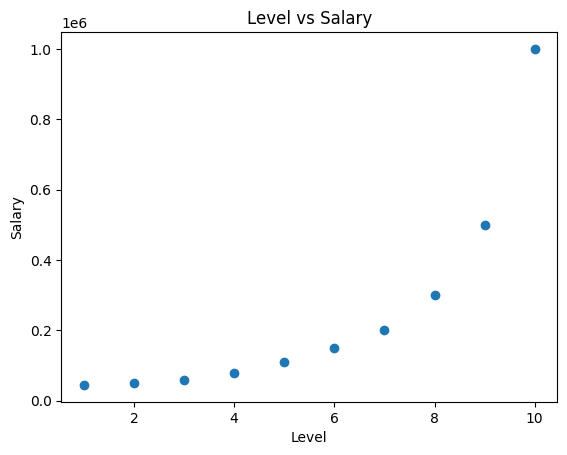

In [ ]:
#plt level vs salary graph
plt.scatter(df["Level"], df["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Level vs Salary")
plt.show()
#it clearly shows non-linear relationship

#Split the data

In [ ]:
#split into independent and dependent
X = df.iloc[:, 1:-1].values #selects all rows (:), columns from index 1 up to (but not including) the last column.
y = df.iloc[:, -1].values #selects the last column (“Salary”) for all rows

In [ ]:
#split into training and test set
#Let not splitted intrain and test because dataset is very small
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Building the Model

In [ ]:
#linear model first
linear_model = LinearRegression()
linear_model.fit(X, y) # train a straight‐line fit to (Level → Salary)

LinearRegression()

In [ ]:
#transform all the values of X to degree of 4
#refer to demos graph to check the polynomial graphs
# y = B0 + B1X1^4
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

#build the polynomial model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

## Predictions

In [ ]:
#Making predictions with both models
y_pred_linear = linear_model.predict(X)
y_pred_poly = poly_model.predict(poly_reg.fit_transform(X))

In [ ]:
#create data frame for each respective model
df_linear = pd.DataFrame({"Actual": y, "Predicted": y_pred_linear})
df_poly = pd.DataFrame({"Actual": y, "Predicted": y_pred_poly})

df_linear


,Actual,Predicted
0,45000,-114454.545455
1,50000,-33575.757576
2,60000,47303.030303
3,80000,128181.818182
4,110000,209060.606061
5,150000,289939.393939
6,200000,370818.181818
7,300000,451696.969697
8,500000,532575.757576
9,1000000,613454.545455


In [ ]:
df_poly

,Actual,Predicted
0,45000,53356.643357
1,50000,31759.906760
2,60000,58642.191142
3,80000,94632.867133
4,110000,121724.941725
5,150000,143275.058275
6,200000,184003.496504
7,300000,289994.172494
8,500000,528694.638695
9,1000000,988916.083916


Text(0.5, 1.0, 'Linear Model')

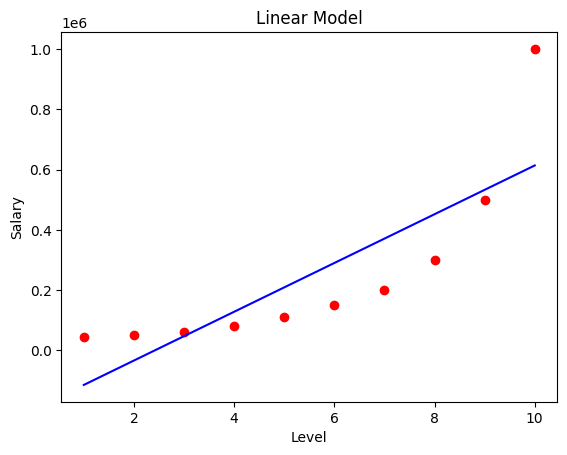

In [ ]:
#plot linear model prediction vs actual
plt.scatter(X, y, color="red")
plt.plot(X, linear_model.predict(X), color="blue")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Linear Model")

Text(0.5, 1.0, 'Polynomial Model')

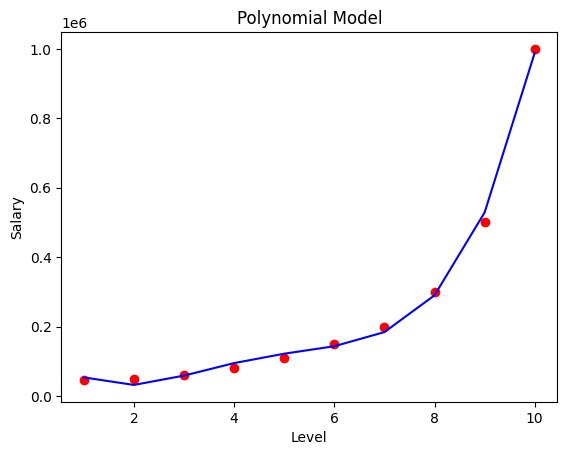

In [ ]:
#plot poly model
plt.scatter(X, y, color="red")
plt.plot(X, poly_model.predict(poly_reg.fit_transform(X)), color="blue")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Polynomial Model")

## Model Evaluation

In [ ]:
#perform evaluation on the whole dataset and reason is that data is very small r2_will not be so accurate
from sklearn.metrics import r2_score
# lm_r2: shows how much variance in y the straight line explains.
lm_r2 = r2_score(y, y_pred_linear)
# poly_r2: shows how much variance the 4th-degree polynomial explains.
poly_r2 = r2_score(y, y_pred_poly)



#we multiply by 100 to express percentage
print("Linear Model R^2", lm_r2*100)
print("Polynomial Model R^2", poly_r2*100)

Linear Model R^2 66.90412331929895
Polynomial Model R^2 99.73922891706614
